# Assignment 1 - Will Barker

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

In [2]:
np.random.seed(95)

In [3]:
df = pd.read_csv("mosquitos_data-2.csv")
df.head()

,Response,Treatment
0,27,Beer
1,20,Beer
2,21,Beer
3,26,Beer
4,27,Beer


### 1. Create side-by-side boxplots for the number of mosquitoes in each group (beer vs water)

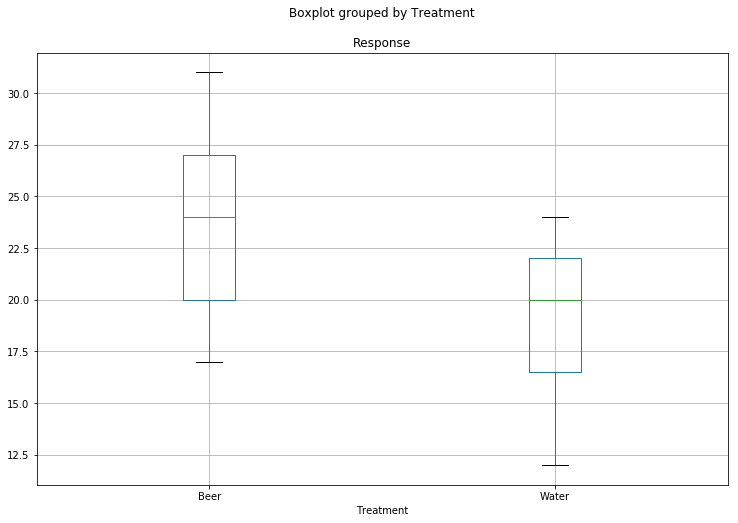

In [4]:
df.boxplot("Response", by='Treatment', figsize=(12,8))

### 2. Answer the question: What does the graph reveal about the data for both groups? Is there an association between beer consumption and attractiveness to mosquitoes?

The boxplot visualizes key statistics in the distributions of the beer and water groups. The bottom and top whiskers of each boxplot show the range of values outside of the 1st and 3rd quartiles respectively. The boxes themselves show the interquartile range (range of values between 1st and 3rd quartiles), while the green line represents the distribution's median (2nd quartile).

The boxplots reveal a sizeable difference between the median mosquitos of beer and water drinkers - 24 and 20. This provides some evidence towards the hypothesis that there is a difference between the groups.

For beer drinkers, the boxplot shows that 50% of the sample results (data between the 1st and 3rd interquartile range) were between 20 and 27 mosquitos. This is a fairly large spread, suggesting a higher degree of uncertainty around 24 mosquitos being the population mean for beer drinkers.

The interquartile range for water drinkers is slightly smaller, between 16 and 22 mosquitos. This range is also kind of big so it's hard to be too confident about our median being representative of the populatin.

An overlap exists between the interquartile ranges of the two groups - there is some probability that these results could just be the result of noise from a single distribution (i.e. these results could be the result of random chance).

### 3. Calculate basic statistics measures for each group: the mean, median, standard deviation and explain the numbers.

Mean - the average value in a set of data, the mean is a point statistic describing central tendency. Here, the average value of mosquitos in the beer and water samples are 23.6 and 19.22, respectively.

In [5]:
groups = df.groupby("Treatment")
group_means = groups.mean()
group_means

,Response
Treatment,
Beer,23.600000
Water,19.222222


Median - the "middle" number of mosquitos in an ordered list of each group's samples. Another way of expressing central tendency, but less sensitive to outliers than the mean. In this case the median is close to the mean, sitting at 24 mosquitos for the beer samples and 20 mosquitos for the water samples.

In [6]:
group_medians = groups.median()
group_medians

,Response
Treatment,
Beer,24
Water,20


Standard Deviation - a measure of dispersion in the group's distributions. A smaller standard deviation indicates that the data tends to be closer to the mean, while a larger standard deviation indicates that it's more spread out. The standard deviation is larger for beer drinkers, indicating that the data is more spread out among those samples.

In [7]:
group_std = groups.std()
group_std

,Response
Treatment,
Beer,4.133199
Water,3.671120


### 4. Write the code to implement the data simulation demonstrated in the above mentioned video. Calculate the probability of obtaining the experiment outcome.

We conduct a random permutation test to see if a difference of 4.4 mosquitos between the groups is significant.

The **Null Hypothesis** in this test is that there is no difference between the groups.
The **Alternate Hypothesis** is that there is a difference.

By randomly shuffling the data, reassigning into the beer and water labels, and taking the difference between the two means, we build the sampling distribution of the Null Hypothesis (that there is no difference between the groups). We can then see whether a difference of 4.4 mosquitos is either large enough to be significantly rare or explainable by randomness.

In [8]:
mosquito_diff = 4.4                         # Is this difference between our original beer
                                            # and water samples statistically significant?

n_trials = 50000                            # Run 50,000 random permutations
n_beer = len(df[df.Treatment == 'Beer'])    # We can split our shuffled data at the point of the first n_beer values
responses = df.Response

In [9]:
def shuffle_and_calculate_means():
    shuffled_data = np.random.permutation(responses)
    beer, water = shuffled_data[:n_beer], shuffled_data[n_beer:]   # The new data for beer and water groups
    beer_mean, water_mean = beer.mean(), water.mean()              # Calculate each group's mean
    
    return beer_mean, water_mean

In [19]:
deltas = []
for _ in range(n_trials):
    beer, water = shuffle_and_calculate_means()
    deltas.append(beer - water)                    # Take the difference between both groups

delta_permutations = pd.Series(deltas)

Text(0.5,1,'Histogram of delta between beer and water means')

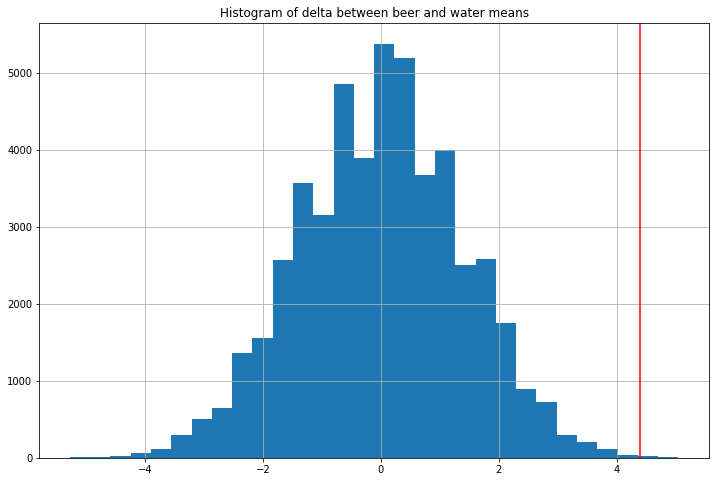

In [20]:
delta_permutations.hist(bins=30, figsize=(12,8))
plt.axvline(mosquito_diff, c='r')
plt.title("Histogram of delta between beer and water means")

The histogram of deltas shows that under the Null Hypothesis, the deltas are unsurprisingly centered around 0. Deltas of 4.4 or higher hardly ever occurred, with that point being designated by the red vertical line at the right tail. Therefore, we can conclude that under the Null Hypothesis a delta of 4.4 is statistically significant.

In [21]:
n_critical = len(delta_permutations[delta_permutations >= mosquito_diff]) # How many delta were equal or greater
pct = round((n_critical/len(delta_permutations)) * 100, 3)                # than 4.4?

In [22]:
print("# permutations equal or greater than origial sample difference: {} ({}% of total)"\
      .format(n_critical, pct))

# permutations equal or greater than origial sample difference: 24 (0.048% of total)


Only 13 out of our 50,000 random permutations yielded a difference greater than 4.4. Given the Null Hypothesis, that there is no difference between beer and water drinkers, this result is extremely unlikely to occur. Therefore we reject the Null Hypothesis in favour of our Alternative Hypothesis, which seems to be more representative of reality: **there is a difference between beer and water drinkers.**